In [1]:
import numpy as np
import numpy.random as rd
from statsmodels.stats.diagnostic import kstest_normal as lil
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
sizes = range(10, 901, 10)
rep = 100
alpha = 0.05

In [3]:
# generate samples from truncated normal distribution
def gen_trunc(sze):
    samp = []
    samp_len = 0
    while samp_len < sze:
        s = rd.normal()
        if s <= 2 and s >= -2:
            samp.append(s)
            samp_len += 1
    return np.array(samp)

In [4]:
# plot power of a given test for 4 true distributions
def pow_plt1(test, test_name):
    pow_norm = []
    pow_lapl = []
    pow_stud = []
    pow_trunc = []

    for sze in sizes:
        it = 0
        rej_norm = 0
        rej_lapl = 0
        rej_stud = 0
        rej_trunc = 0

        while it < rep:

            samp = rd.normal(size=sze)
            p = test(samp)[1]
            if p < alpha:
                rej_norm += 1

            samp = rd.laplace(size=sze)
            p = test(samp)[1]
            if p < alpha:
                rej_lapl += 1

            samp = rd.standard_t(4, size=sze)
            p = test(samp)[1]
            if p < alpha:
                rej_stud += 1

            samp = gen_trunc(sze)
            p = test(samp)[1]
            if p < alpha:
                rej_trunc += 1

            it += 1

        pow_norm.append(rej_norm / rep)
        pow_lapl.append(rej_lapl / rep)
        pow_stud.append(rej_stud / rep)
        pow_trunc.append(rej_trunc / rep)
        
    plt.plot(sizes, pow_norm, label = 'normal')
    plt.plot(sizes, pow_lapl, label = 'laplace')
    plt.plot(sizes, pow_stud, label = 'student')
    plt.plot(sizes, pow_trunc, label = 'truncated normal')

    plt.title(test_name)
    plt.grid()
    plt.xlabel('sample size')
    plt.ylabel('power')
    plt.legend()
    plt.show()

## Lilliefors

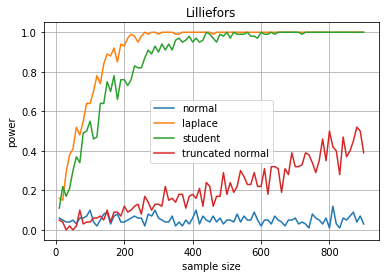

In [5]:
pow_plt1(lil, 'Lilliefors')

Plot for the normal distribution is low (false positives are rare), hence Lillieforce test is conservative.
Power for the truncated normal distribution is low.

## Jarque-Bera

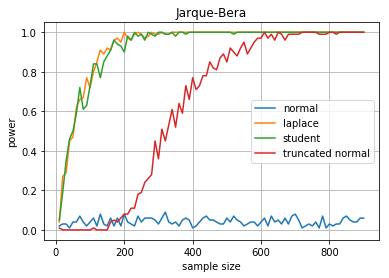

In [6]:
pow_plt1(st.jarque_bera, 'Jarque-Bera')

Plot for the normal distribution is low (false positives are rare), hence Jarque-Bera test is conservative.
Power for the truncated normal distribution is low for small numbers of samples.

## Shapiro-Wilk

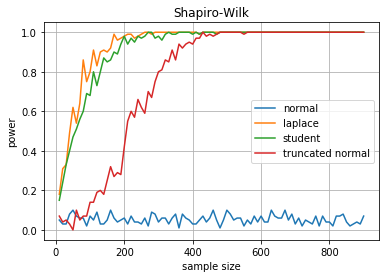

In [7]:
pow_plt1(st.shapiro, 'Shapiro-Wilk')

Plot for the normal distribution is low (false positives are rare), hence Shapiro-Wilk test is conservative.
Power for the truncated normal distribution is greater than that of other tests.

In [8]:
# plot power of 3 tests for a given true distibution
def pow_plt2(gener, distr_name):
    pow_lil = []
    pow_jarq = []
    pow_shap = []

    for sze in sizes:
        it = 0
        rej_lil = 0
        rej_jarq = 0
        rej_shap = 0

        while it < rep:
            samp = gener(sze)
            
            p_lil = lil(samp)[1]
            if p_lil < alpha:
                rej_lil += 1

            p_jarq = st.jarque_bera(samp)[1]
            if p_jarq < alpha:
                rej_jarq += 1

            p_shap = st.shapiro(samp)[1]
            if p_shap < alpha:
                rej_shap += 1

            it += 1

        pow_lil.append(rej_lil / rep)
        pow_jarq.append(rej_jarq / rep)
        pow_shap.append(rej_shap / rep)
        
    plt.plot(sizes, pow_lil, label = 'Lilliefors')
    plt.plot(sizes, pow_jarq, label = 'Jarque-Bera')
    plt.plot(sizes, pow_shap, label = 'Shapiro-Wilk')

    plt.title(distr_name)
    plt.grid()
    plt.xlabel('sample size')
    plt.ylabel('power')
    plt.legend()
    plt.show()

## Normal

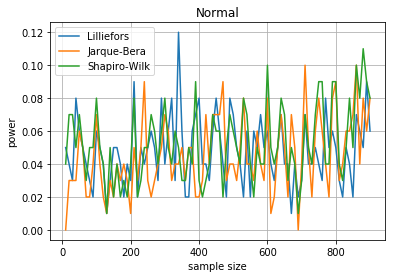

In [9]:
pow_plt2(lambda sze : rd.normal(size=sze), 'Normal')

False positives are rare. All tests are conservative.

## Laplace

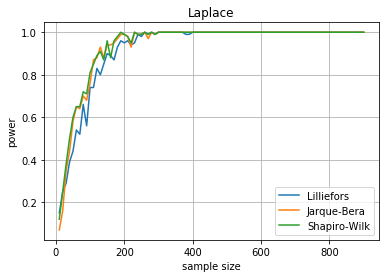

In [10]:
pow_plt2(lambda sze : rd.laplace(size=sze), 'Laplace')

In case of Laplace distribution, the tests show almost equal power for all numbers of samples.

## Student

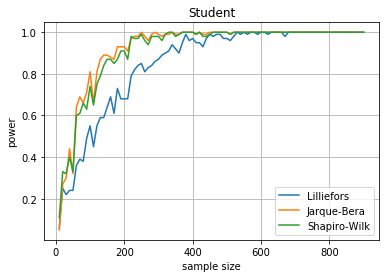

In [11]:
pow_plt2(lambda sze : rd.standard_t(4, size=sze), 'Student')

In case of Student distribution, power of Jarque-Bera and Shapiro-Wilk tests are almost equal. Power of Lilliefors test is less for small numbers of samples.

## Truncated normal

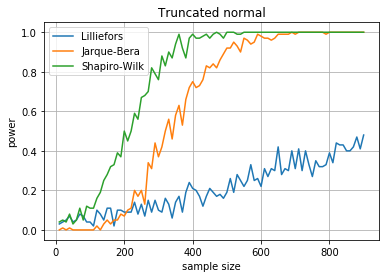

In [12]:
pow_plt2(gen_trunc, 'Truncated normal')

In case of truncated normal distribution, the power of Shapiro-Wilk test is greater than the power of Jarke-Bera test. The latter is greater than the power of Lilliefors test.

** Conclusion: **
All tests are conservative. Shapiro-Wilk test has the greatest power. Lilliefors test has the smallest power.